# Question 1

1.Load, read and clean ​A2_question1_data.csv ​ ​file ( File can be found in the one-drive assignments/a2 folder)

In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('a2/data/A2_question1_data.csv')

2.Describe the dataset and identify any interesting patters with event transitions for client events. [1 point]

In [23]:
df.head()

,When,ap_id,channel,client_id,event_code,failure_count,fw_id,latency1,latency2,lease_time,reason_code1,reason_code2,reason_code3,rebind_time,renewal_time,rssi,rssi_of_request,site_id,time_since_req,wlan_id
0,2018-01-01T00:18:13.515Z,c43da45852d25367,1.0,94e3f8e0-a8d7-9a06-d6cc-ee98be6ea82e,6,NaN,b7e75925064d78db,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-42.0,-40.0,67970e46-4e12-11e6-9188-0242ac110007,7.769991,49103402-4e17-11e6-9188-0242ac110007
1,2018-01-01T00:18:13.515Z,c43da45852d25367,1.0,94e3f8e0-a8d7-9a06-d6cc-ee98be6ea82e,40,NaN,b7e75925064d78db,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-39.0,NaN,67970e46-4e12-11e6-9188-0242ac110007,-1.000000,49103402-4e17-11e6-9188-0242ac110007
2,2018-01-01T00:28:19.005Z,c43da45852d25367,1.0,94e3f8e0-a8d7-9a06-d6cc-ee98be6ea82e,40,NaN,b7e75925064d78db,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-42.0,NaN,67970e46-4e12-11e6-9188-0242ac110007,-1.000000,49103402-4e17-11e6-9188-0242ac110007
3,2018-01-01T00:33:07.673Z,7f11bb0d657ed697,1.0,94e3f8e0-a8d7-9a06-d6cc-ee98be6ea82e,13,1.0,b7e75925064d78db,NaN,0.001091,NaN,NaN,NaN,NaN,NaN,NaN,-44.0,NaN,67970e46-4e12-11e6-9188-0242ac110007,0.499878,00000000-0000-0000-0000-000000000000
4,2018-01-01T00:33:22.321Z,7f11bb0d657ed697,1.0,94e3f8e0-a8d7-9a06-d6cc-ee98be6ea82e,40,NaN,b7e75925064d78db,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,-45.0,NaN,67970e46-4e12-11e6-9188-0242ac110007,-1.000000,49103402-4e17-11e6-9188-0242ac110007


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158481 entries, 0 to 158480
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   When             158481 non-null  object 
 1   ap_id            158481 non-null  object 
 2   channel          147166 non-null  float64
 3   client_id        158481 non-null  object 
 4   event_code       158481 non-null  int64  
 5   failure_count    1887 non-null    float64
 6   fw_id            153868 non-null  object 
 7   latency1         14847 non-null   float64
 8   latency2         27315 non-null   float64
 9   lease_time       26390 non-null   float64
 10  reason_code1     52058 non-null   float64
 11  reason_code2     38291 non-null   float64
 12  reason_code3     24037 non-null   float64
 13  rebind_time      26392 non-null   float64
 14  renewal_time     26389 non-null   float64
 15  rssi             120398 non-null  float64
 16  rssi_of_request  28748 non-null   floa

In [25]:
df['event_code'].value_counts()

8       26392
10      20921
40      16644
23      14761
15      13725
7       13626
4       13135
6        6815
49       5977
24       5501
5        4822
1005     4432
30       3648
9        2364
50       1661
13        923
26        636
14        483
1         481
43        400
17        269
47        203
1004      146
48        125
18        102
34         97
27         86
45         34
1011       27
42         16
37         11
1006        7
29          7
44          4
Name: event_code, dtype: int64

3.Plot the time series of the hourly number of events for a random access point. [2 points]

In [26]:
df['Hour'] = df['When'].str.extract('(.*?T\d{2})',expand=True)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
ap_ids = df['ap_id'].unique()

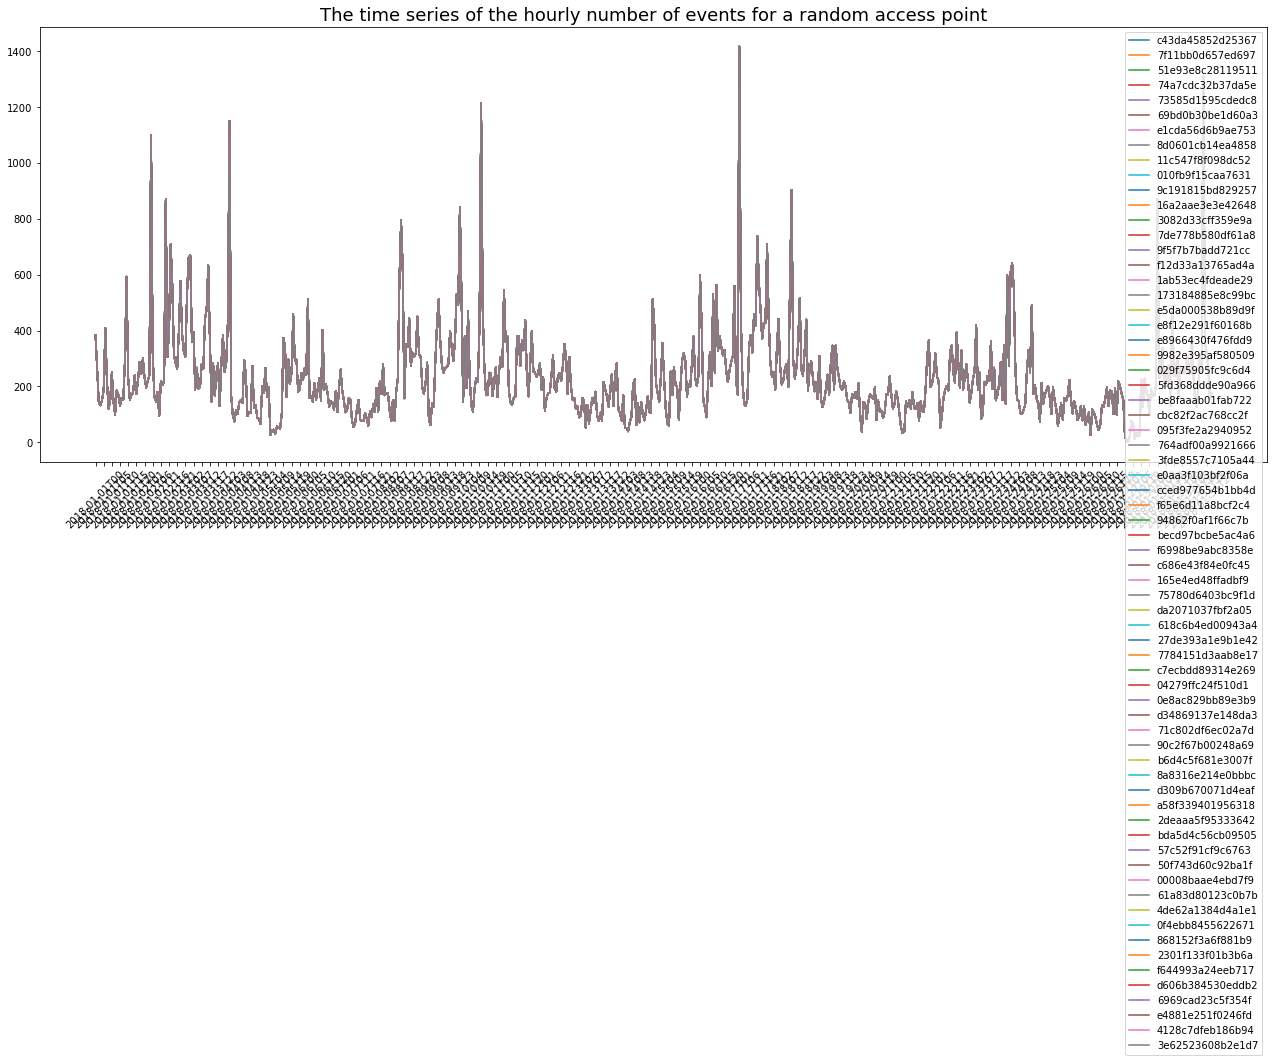

In [29]:
plt.figure(figsize=(22,8))
for ap_id in ap_ids:
    df1 = df[df['ap_id']==ap_id]
    
    res = df['Hour'].value_counts().sort_index()
    key = res.index.values.tolist()
    val = res.values.tolist()
    plt.plot(val,label=ap_id)
    plt.xticks(np.arange(len(key))[::5],key[::5],rotation=45)
plt.title('The time series of the hourly number of events for a random access point',fontsize=18)
plt.legend()
plt.show()

# Question 2

1.Read the Dataset - ​A2_question2_data.csv (File can be found in the one-drive assignments/a2 folder)

In [30]:
df = pd.read_csv('a2/data/A2_question2_data.csv')

2.In your work/notebook please show the basic statistics on the dataset. Are any data points missing? Explain any preprocessing steps and exploratory data analysis that was performed before you start building the model.

In [31]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [32]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [34]:
df.isnull().sum()#no missing data

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

It can be seen that there are no missing values

In [35]:
df.columns.values.tolist()

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [36]:
import numpy as np

In [72]:
columns = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population','Price']
for col in columns:
    std = df[col].std()
    u = df[col].mean()
    
    df = df[np.abs(df[col]-u) < 3*std]

The 3σ law means that 99.7% of the data falls within the range of plus or minus three standard deviations from the mean, and is mainly used to remove outliers. Here, the removal of outliers is realized through Python.

In [73]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


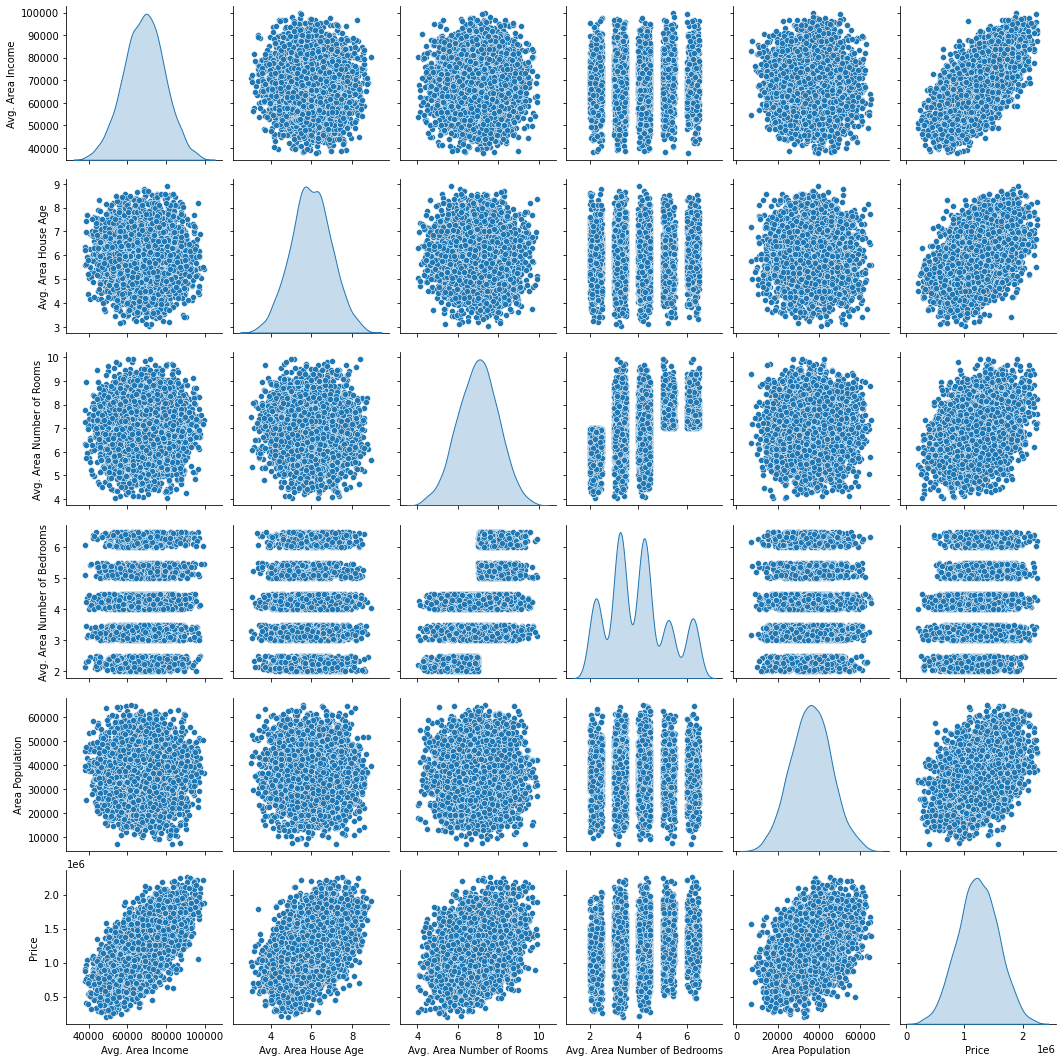

In [74]:
sns.pairplot(data=df, diag_kind='kde')

Above the figure, we can find that Price shows a positive correlation with 'Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'

3.Split the data into train/validation/test sets (Typically 70%,10%,20%).

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

In [77]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)

# Now since we want the valid size is 10% and the test size is 20%. 
# we have to define valid_size=0.33 (that is 33% of remaining data)
test_size = 0.33
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

4.Build and evaluate the model. Feel free to add/drop features to tune your model performance.

In [78]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [79]:
print(linreg.intercept_)
print(linreg.coef_)

-2624099.8109244504
[2.15671803e+01 1.66133501e+05 1.19028698e+05 1.53737823e+03
 1.51066827e+01]


5.Please explain your work and findings.

In [113]:
y_pred = linreg.predict(X_test)
from sklearn import metrics

print("MSE:",metrics.mean_squared_error(y_test, y_pred))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 ：{:.4f}'.format(linreg.score(X_test, y_test)))

print("MAPE:",np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

MSE: 10280827513.439327
RMSE: 101394.41559296708
R2 ：0.9166
MAPE: 0.27398399786663


The determination coefficient R square is an important evaluation index of linear regression. From the obtained results, the R square is 0.9166. It can be seen that the model fits better and the prediction is more accurate.

## Some attempts to reduce MSE

### Data Normalized 

I was confused by the high values of both R square and MSE. In order to make the MSE values lower, I tried to use normalized processing data values and then train the model.

In [111]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_train_std

lr3 = LinearRegression()

lr3.fit(X_train_std,y_train)

lr3.score(X_train_std,y_train)

y_pred = linreg.predict(X_train_std)
from sklearn import metrics

print("MSE:",metrics.mean_squared_error(y_train, y_pred))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))




MSE: 14930683571809.594
RMSE: 3864024.271638261


But the result of R square was lowered instead and MSE was higher, which confused me even more.

### Multicollinearity 

In [89]:
from sklearn.preprocessing import PolynomialFeatures
X.columns = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

In [90]:
poly = PolynomialFeatures(degree=2).fit(X,y) 


In [91]:
poly.get_feature_names(X.columns)#Constructing columns by polynomials

['1',
 'Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Avg. Area Income^2',
 'Avg. Area Income Avg. Area House Age',
 'Avg. Area Income Avg. Area Number of Rooms',
 'Avg. Area Income Avg. Area Number of Bedrooms',
 'Avg. Area Income Area Population',
 'Avg. Area House Age^2',
 'Avg. Area House Age Avg. Area Number of Rooms',
 'Avg. Area House Age Avg. Area Number of Bedrooms',
 'Avg. Area House Age Area Population',
 'Avg. Area Number of Rooms^2',
 'Avg. Area Number of Rooms Avg. Area Number of Bedrooms',
 'Avg. Area Number of Rooms Area Population',
 'Avg. Area Number of Bedrooms^2',
 'Avg. Area Number of Bedrooms Area Population',
 'Area Population^2']

In [92]:
X_ = poly.transform(X)  #After polynomial change
X_


array([[1.00000000e+00, 7.95454586e+04, 5.68286132e+00, ...,
        1.67281000e+01, 9.44250141e+04, 5.33000357e+08],
       [1.00000000e+00, 7.92486425e+04, 6.00289981e+00, ...,
        9.54810000e+00, 1.24134793e+05, 1.61387573e+09],
       [1.00000000e+00, 6.12870672e+04, 5.86588984e+00, ...,
        2.63169000e+01, 1.89205478e+05, 1.36029368e+09],
       ...,
       [1.00000000e+00, 6.33906869e+04, 7.25059061e+00, ...,
        4.53690000e+00, 7.08568899e+04, 1.10663644e+09],
       [1.00000000e+00, 6.80013312e+04, 5.53438842e+00, ...,
        2.95936000e+01, 2.31883374e+05, 1.81694349e+09],
       [1.00000000e+00, 6.55105818e+04, 5.99230531e+00, ...,
        1.65649000e+01, 1.89260225e+05, 2.16236940e+09]])

In [93]:
reg = LinearRegression().fit(X_,y)#Modeling training using transformed data

reg.coef_


array([ 0.00000000e+00,  2.15053481e+01,  1.49872055e+05,  1.21440058e+05,
        1.95505039e+04,  1.47286533e+01,  3.54086871e-06,  3.86626181e-03,
       -2.00756821e-01,  4.41388681e-02,  2.19990682e-05,  1.54767041e+03,
        1.29043989e+03, -1.94745160e+03, -1.18572856e-01,  3.84729302e+02,
       -1.05541111e+02, -1.91855885e-03, -8.40182947e+02, -3.22591210e-02,
       -4.38426749e-06])

In [94]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]


[('1', 0.0),
 ('Avg. Area Income', 21.50534812143855),
 ('Avg. Area House Age', 149872.0549892291),
 ('Avg. Area Number of Rooms', 121440.05806057395),
 ('Avg. Area Number of Bedrooms', 19550.503882580677),
 ('Area Population', 14.728653252460669),
 ('Avg. Area Income^2', 3.540868711127132e-06),
 ('Avg. Area Income Avg. Area House Age', 0.0038662618053253717),
 ('Avg. Area Income Avg. Area Number of Rooms', -0.20075682149732935),
 ('Avg. Area Income Avg. Area Number of Bedrooms', 0.044138868077318705),
 ('Avg. Area Income Area Population', 2.1999068215983186e-05),
 ('Avg. Area House Age^2', 1547.67040740862),
 ('Avg. Area House Age Avg. Area Number of Rooms', 1290.4398865945461),
 ('Avg. Area House Age Avg. Area Number of Bedrooms', -1947.451601982802),
 ('Avg. Area House Age Area Population', -0.11857285573272006),
 ('Avg. Area Number of Rooms^2', 384.7293022185784),
 ('Avg. Area Number of Rooms Avg. Area Number of Bedrooms',
  -105.54111122041387),
 ('Avg. Area Number of Rooms Area P

In [95]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

coeff


,0,1
0,1,0.0
1,Avg. Area Income,21.505348
2,Avg. Area House Age,149872.054989
3,Avg. Area Number of Rooms,121440.058061
4,Avg. Area Number of Bedrooms,19550.503883
5,Area Population,14.728653
6,Avg. Area Income^2,0.000004
7,Avg. Area Income Avg. Area House Age,0.003866
8,Avg. Area Income Avg. Area Number of Rooms,-0.200757
9,Avg. Area Income Avg. Area Number of Bedrooms,0.044139


In [96]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

coeff


,0,1
0,1,0.0
1,Avg. Area Income,21.505348
2,Avg. Area House Age,149872.054989
3,Avg. Area Number of Rooms,121440.058061
4,Avg. Area Number of Bedrooms,19550.503883
5,Area Population,14.728653
6,Avg. Area Income^2,0.000004
7,Avg. Area Income Avg. Area House Age,0.003866
8,Avg. Area Income Avg. Area Number of Rooms,-0.200757
9,Avg. Area Income Avg. Area Number of Bedrooms,0.044139


In [109]:
lr1 = LinearRegression().fit(X_,y)
lr1.score(X_,y)



0.9145826564331038

R square is also getting lower

I also have a idea to lower MSE. First, clustering the values of features, then hot-coding them according to the classification results, and then normalizing them, which should lead to a lower MSE. I hope to implement it in the subsequent learning process.